## Importing Libraries and Dataset

In [577]:
import pandas as pd
import numpy as np
from pulp import*

import seaborn as sns

import datetime

In [420]:
import warnings
warnings.filterwarnings("ignore")

In [421]:
df1 = pd.read_csv("C:/Users/vubanc/OneDrive - University of Arkansas/Research/SMILIES/Data Analysis/Regular bike datasets/Cleaned Data/CombinedRentals_AllStations.csv")
df2 = pd.read_csv("C:/Users/vubanc/OneDrive - University of Arkansas/Research/SMILIES/Data Analysis/Regular bike datasets/Cleaned Data/CombinedRentals_NewStations.csv")
df_userInfo = pd.read_csv("C:/Users/vubanc/OneDrive - University of Arkansas/Research/SMILIES/Data Analysis/Trip end datasets/Cleaned Data/TripLevelUserInfo.csv")

In [422]:
print(df1.shape)
df1.head(2)

(3127, 20)


,index,id,user,user_id,user_phone,start_station,start_time,start_time_local,end_station,end_time,end_time_local,kilometers,miles,message_count,type,duration (seconds),rating,device_id,bike_type,Date
0,1,cbb50c2e-2204-4347-9fac-5b642816b31f,Chris OBryan,49b103a1-1c11-4ba4-8f48-25b55352f331,18033691842,Chafee Crossing,2023-06-26 01:41:57.903139+00:00,2023-06-25 19:41:57.903139-06:00,Chafee Crossing,2023-06-26 02:09:19.903139+00:00,2023-06-25 20:09:19.903139-06:00,3.628,2.254330,50,22,1642,NaN,6c37f59f344e9a727e34912f80a864258d6fda9d34cdc2...,Regular Bike,2023-06-25
1,7,72cfc8bd-b45a-4820-8813-658628423957,Barbara Safranek,74cf2ef0-445c-4535-92ff-61993b821f75,19177549168,Convention Center,2023-06-25 22:30:43.031060+00:00,2023-06-25 16:30:43.031060-06:00,Convention Center,2023-06-26 00:02:56.031060+00:00,2023-06-25 18:02:56.031060-06:00,18.420,11.445635,15,22,5533,5.0,d129323df3c91b98a64006fc0ad1ec296a4585b5e2ef70...,Regular Bike,2023-06-25


In [423]:
print(df2.shape)
df2.head(2)

(2969, 20)


,index,id,user,user_id,user_phone,start_station,start_time,start_time_local,end_station,end_time,end_time_local,kilometers,miles,message_count,type,duration (seconds),rating,device_id,bike_type,Date
0,1,cbb50c2e-2204-4347-9fac-5b642816b31f,Chris OBryan,49b103a1-1c11-4ba4-8f48-25b55352f331,18033691842,Chafee Crossing,2023-06-26 01:41:57.903139+00:00,2023-06-25 19:41:57.903139-06:00,Chafee Crossing,2023-06-26 02:09:19.903139+00:00,2023-06-25 20:09:19.903139-06:00,3.628,2.254330,50,22,1642,NaN,6c37f59f344e9a727e34912f80a864258d6fda9d34cdc2...,Regular Bike,2023-06-25
1,7,72cfc8bd-b45a-4820-8813-658628423957,Barbara Safranek,74cf2ef0-445c-4535-92ff-61993b821f75,19177549168,Convention Center,2023-06-25 22:30:43.031060+00:00,2023-06-25 16:30:43.031060-06:00,Convention Center,2023-06-26 00:02:56.031060+00:00,2023-06-25 18:02:56.031060-06:00,18.420,11.445635,15,22,5533,5.0,d129323df3c91b98a64006fc0ad1ec296a4585b5e2ef70...,Regular Bike,2023-06-25


In [424]:
print(df_userInfo.shape)
df_userInfo.head(2)

(385, 40)


,id_x,user,user_id,user_phone,start_station,start_time,start_time_local,end_station,end_time,end_time_local,...,Education,Employment,Email Address,Number of Household Vehicles,Desired Fare,Feeling,Primary Mode,Employed Home ZIP,Employed Work ZIP,Employed
0,85736f3e-78e1-4a10-a52a-d2e3a71cc310,Nick Harris,d76429ef-a427-4c2b-8b43-c1c0ab9029e5,4794592980,Kinkead and Waldron,2023-06-25 15:07:15.847225+00:00,2023-06-25 09:07:15.847225-06:00,Kinkead and Waldron,2023-06-25 15:32:54.847225+00:00,2023-06-25 09:32:54.847225-06:00,...,Some College,Working – Part time,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
1,c933c54b-cead-4dea-9ae0-31305a06e024,Nick Harris,d76429ef-a427-4c2b-8b43-c1c0ab9029e5,4794592980,Kinkead and Waldron,2023-01-18 21:16:14.586071+00:00,2023-01-18 15:16:14.586071-06:00,Kinkead and Waldron,2023-01-18 22:05:03.586071+00:00,2023-01-18 16:05:03.586071-06:00,...,Some College,Working – Part time,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


## Extracting Parameters

In [665]:
#Extracting monthly demand
total_days = max(pd.to_datetime(df1["start_time"])) - min(pd.to_datetime(df1["start_time"]))
print(f"Total number of days in operation: {total_days.days}")

total_trips = df1["id"].count()
print(f"Total number of trips: {total_trips}")

monthly_demand = total_trips*30/total_days.days
print(f"Monthly demand: {int(monthly_demand)} trips/month")

Total number of days in operation: 419
Total number of trips: 3127
Monthly demand: 223 trips/month


In [666]:
#Extracting trip rate at each station
def Ext_TripRate(df2, bike_mean, bike_std):
    df_tripRate = pd.DataFrame(df2.groupby("start_station")["id"].count())
    df_tripRate.columns = ["Trips"]
    df_tripRate["Days"] = 0

    stations = df2["start_station"].unique()
    new_stations = ["Riverfront Park", "Woodlawn Park", "Fort Smith Housing Authority"]
    
    #Specifying the number of days of operation for new stations and old stations
    for station in stations:
        if station in new_stations:
            first_trip_date = datetime.datetime.strptime("11-15-2022", "%m-%d-%Y").date()
        else:
            first_trip_date = datetime.datetime.strptime("05-02-2022", "%m-%d-%Y").date()
        last_trip_date = max(pd.to_datetime(df2["start_time"])).date()
        total_days = (last_trip_date - first_trip_date).days
        df_tripRate.loc[station,"Days"] = total_days
    
    #Creating an array of bike aviliability for 8 stations
    bike_availability = (np.random.normal(bike_mean, bike_std, 8)).astype(int)
    bike_availability = [i if i>0 else 1 for i in bike_availability] #Avergae availability must be more than 0
    bike_availability = [i if i<8 else 8 for i in bike_availability] #Avergae availability must be less than 8
    
    df_tripRate["Trip Rate"] = df_tripRate["Trips"]*30/(bike_availability*df_tripRate["Days"])
    
    print(bike_availability)
    
    return df_tripRate

df_tripRate = Ext_TripRate(df2, 4, 2)
df_tripRate

[5, 6, 3, 3, 3, 5, 2, 4]


,Trips,Days,Trip Rate
start_station,,,
32nd and Grand,226,420,3.228571
Chafee Crossing,932,420,11.095238
Convention Center,673,420,16.023810
Fort Smith Housing Authority,49,223,2.197309
Kinkead and Waldron,273,420,6.500000
MLK Park,152,420,2.171429
Riverfront Park,613,223,41.233184
Woodlawn Park,51,223,1.715247


In [667]:
#Extracting trip rates of low-income users at each station
def Ext_lowInc_tripRate(df_userInfo, df_tripRate):
    df_userInfo = df_userInfo[df_userInfo["Household Income"]!="I prefer not to answer"]
    df_userInfo["Income_level"] = np.where(df_userInfo["Household Income"].isin(["< $20,000", "<$20,000 - $34,999", "<$35,000 - $49,999"]), "low", "high")

    df_lowInc = pd.DataFrame(df_userInfo.groupby("start_station")["Income_level"].value_counts(normalize=True))
    df_lowInc.columns = ["% of LowInc Trips"]
    df_lowInc.reset_index(inplace=True)
    df_lowInc.loc[13] = pd.Series({'start_station':"Fort Smith Housing Authority", "Income_level":"low", "% of LowInc Trips": 0.1})

    df_lowInc = df_lowInc[df_lowInc["Income_level"]=="low"]
    df_lowInc.set_index("start_station", inplace=True)

    df_lowInc["LowInc Trip Rate"] = 0
    for station in df_lowInc.index:
        df_lowInc.loc[station, "LowInc Trip Rate"] = df_tripRate.loc[station, "Trip Rate"]*df_lowInc.loc[station, "% of LowInc Trips"]

    df_lowInc.drop("Income_level", axis=1, inplace=True)
    return df_lowInc

df_lowInc = Ext_lowInc_tripRate(df_userInfo, df_tripRate)
df_lowInc

,% of LowInc Trips,LowInc Trip Rate
start_station,,
32nd and Grand,1.000000,3.228571
Chafee Crossing,0.707483,7.849692
Convention Center,0.781250,12.518601
Kinkead and Waldron,0.988095,6.422619
MLK Park,0.625000,1.357143
Riverfront Park,0.636364,26.239299
Woodlawn Park,0.500000,0.857623
Fort Smith Housing Authority,0.100000,0.219731


In [668]:
#Extracting trip rates of captive users at each station
def Ext_captive_tripRate(df_userInfo, df_tripRate):
    df_userInfo["Captivity"] = 0
    df_userInfo["Captivity"] = np.where(df_userInfo["Number of Household Vehicles"].isin(["None"]), "captive", df_userInfo["Captivity"])
    df_userInfo["Captivity"] = np.where(df_userInfo["Number of Household Vehicles"].isin(["1", "2", "3 or more", np.nan]), "non-captive", df_userInfo["Captivity"])

    df_captive = pd.DataFrame(df_userInfo.groupby("start_station", group_keys=True)["Captivity"].value_counts(normalize=True))
    df_captive.columns = ["% of Captive Trips"]
    df_captive.reset_index(inplace=True)
    df_captive.loc[13] = pd.Series({'start_station':"Fort Smith Housing Authority", "Captivity":"captive", "% of Captive Trips": 0.1})
    df_captive.loc[14] = pd.Series({'start_station':"MLK Park", "Captivity":"captive", "% of Captive Trips": 0})


    df_captive = df_captive[df_captive["Captivity"]=="captive"]
    df_captive.set_index("start_station", inplace=True)

    df_captive["Captive Trip Rate"] = 0
    for station in df_captive.index:
        df_captive.loc[station, "Captive Trip Rate"] = df_tripRate.loc[station, "Trip Rate"]*df_captive.loc[station, "% of Captive Trips"]

    df_captive.drop("Captivity", axis=1, inplace=True)
    
    return df_captive

df_captive = Ext_captive_tripRate(df_userInfo, df_tripRate)
df_captive

,% of Captive Trips,Captive Trip Rate
start_station,,
32nd and Grand,0.210526,0.679699
Chafee Crossing,0.181818,2.017316
Convention Center,0.257143,4.120408
Kinkead and Waldron,0.021739,0.141304
Riverfront Park,0.269231,11.101242
Woodlawn Park,0.500000,0.857623
Fort Smith Housing Authority,0.100000,0.219731
MLK Park,0.000000,0.000000


In [669]:
#Extracting trip rates of working users at each station
def Ext_worker_tripRate(df_userInfo, df_tripRate):
    df_userInfo["Employed"] = np.where(df_userInfo["Employment"].isin(["Working-Full time", "Working - Part time"]), "working", "not working")

    df_worker = pd.DataFrame(df_userInfo.groupby("start_station")["Employed"].value_counts(normalize=True))
    df_worker.columns = ["% of Worker Trips"]
    df_worker.reset_index(inplace=True)
    df_worker.loc[13] = pd.Series({'start_station':"Woodlawn Park", "Employed":"working", "% of Worker Trips": 0.5})
    df_worker.loc[14] = pd.Series({'start_station':"Fort Smith Housing Authority", "Employed":"working", "% of Worker Trips": 0.1})

    df_worker = df_worker[df_worker["Employed"]=="working"]
    df_worker.set_index("start_station", inplace=True)

    df_worker["Worker Trip Rate"] = 0
    for station in df_worker.index:
        df_worker.loc[station, "Worker Trip Rate"] = df_tripRate.loc[station, "Trip Rate"]*df_worker.loc[station, "% of Worker Trips"]

    df_worker.drop("Employed", axis=1, inplace=True)
    
    return df_worker

df_worker = Ext_worker_tripRate(df_userInfo, df_tripRate)
df_worker

,% of Worker Trips,Worker Trip Rate
start_station,,
32nd and Grand,0.736842,2.378947
Chafee Crossing,0.187166,2.076649
Convention Center,0.400000,6.409524
Kinkead and Waldron,0.054348,0.353261
MLK Park,0.333333,0.723810
Riverfront Park,0.423077,17.444809
Woodlawn Park,0.500000,0.857623
Fort Smith Housing Authority,0.100000,0.219731


## Basic Optimization Model 

In [670]:
df_tripRate.index

Index(['32nd and Grand', 'Chafee Crossing', 'Convention Center',
       'Fort Smith Housing Authority', 'Kinkead and Waldron', 'MLK Park',
       'Riverfront Park', 'Woodlawn Park'],
      dtype='object', name='start_station')

In [708]:
def optimize(monthly_demand, df_tripRate, df_lowInc, df_captive, df_worker):
    stations = ['32nd and Grand', 'Chafee Crossing', 'Convention Center', 
                'Fort Smith Housing Authority', 'Kinkead and Waldron', 
                'MLK Park', 'Riverfront Park', 'Woodlawn Park']
    station_indices = [(i) for i in stations]
    
    model = LpProblem("OptimizeBikeAllocation", LpMaximize)
    
    x = LpVariable.dicts("Number_of_bikes", station_indices, lowBound = 5, upBound = 15, cat="Integer")

    model += lpSum([x[(i)]*df_tripRate.loc[i, "Trip Rate"] for i in stations])
    
    model += lpSum([x[(i)] for i in station_indices]) == 80
    model += lpSum([x[(i)]*df_tripRate.loc[i,"Trip Rate"] for i in stations]) >= monthly_demand
    model += lpSum([x[(i)]*df_lowInc.loc[i,"LowInc Trip Rate"] for i in stations]) >= 0.25*monthly_demand
    model += lpSum([x[(i)]*df_captive.loc[i, "Captive Trip Rate"] for i in stations]) >= 0.25*monthly_demand
    model += lpSum([x[(i)]*df_worker.loc[i,"Worker Trip Rate"] for i in stations]) >= 0.20*monthly_demand
    
    model.solve()
    df_bikes = pd.DataFrame({"Station":[i for i in stations], "Number of Bikes":[x[(i)].varValue for i in stations]})
    
    print(LpStatus[model.status])
    print(int(pulp.value(model.objective)))
    return df_bikes

In [709]:
optimize(monthly_demand, df_tripRate, df_lowInc, df_captive, df_worker)

Optimal
1654


,Station,Number of Bikes
0,32nd and Grand,15.0
1,Chafee Crossing,15.0
2,Convention Center,15.0
3,Fort Smith Housing Authority,5.0
4,Kinkead and Waldron,5.0
5,MLK Park,5.0
6,Riverfront Park,15.0
7,Woodlawn Park,5.0


## Linear Programming Model with Monte Carlo Simulation

In [710]:
df_allScenarios = pd.DataFrame({"Station": ['32nd and Grand', 'Chafee Crossing', 'Convention Center', 
                'Fort Smith Housing Authority', 'Kinkead and Waldron', 
                'MLK Park', 'Riverfront Park', 'Woodlawn Park']})
df_allScenarios.set_index("Station", inplace=True)

for i in range(50):
    df_tripRate = Ext_TripRate(df2, 4, 2)
    df_lowInc = Ext_lowInc_tripRate(df_userInfo, df_tripRate)
    df_captive = Ext_captive_tripRate(df_userInfo, df_tripRate)
    df_worker = Ext_worker_tripRate(df_userInfo, df_tripRate)
    print(f"Scenario {i}:")
    df_bikes = optimize(monthly_demand, df_tripRate, df_lowInc, df_captive, df_worker) #number of bikes for this scenario
    print("\n")
    df_bikes.set_index("Station", inplace=True)
    df_allScenarios = pd.concat([df_allScenarios, df_bikes["Number of Bikes"]], axis=1) #Adding the number of bikes to df with all scenarios

[3, 3, 1, 1, 2, 5, 4, 5]
Scenario 0:
Optimal
1587


[6, 3, 2, 7, 1, 6, 4, 4]
Scenario 1:
Optimal
1330


[3, 5, 8, 5, 3, 2, 2, 2]
Scenario 2:
Optimal
1083


[3, 4, 7, 3, 4, 2, 3, 3]
Scenario 3:
Optimal
920


[3, 6, 2, 8, 4, 1, 7, 2]
Scenario 4:
Optimal
939


[7, 5, 7, 4, 5, 3, 5, 3]
Scenario 5:
Optimal
657


[4, 7, 3, 3, 5, 5, 2, 3]
Scenario 6:
Optimal
1114


[7, 2, 4, 4, 4, 2, 6, 5]
Scenario 7:
Optimal
1018


[7, 7, 2, 3, 2, 3, 4, 1]
Scenario 8:
Optimal
1033


[5, 2, 4, 4, 6, 5, 4, 8]
Scenario 9:
Optimal
1077


[3, 2, 4, 6, 2, 5, 5, 3]
Scenario 10:
Optimal
1127


[2, 5, 2, 4, 1, 4, 5, 4]
Scenario 11:
Optimal
1170


[1, 5, 5, 8, 1, 5, 5, 1]
Scenario 12:
Optimal
1079


[5, 3, 2, 1, 4, 6, 1, 4]
Scenario 13:
Optimal
2087


[5, 3, 2, 5, 4, 4, 4, 4]
Scenario 14:
Optimal
1120


[1, 6, 3, 1, 5, 1, 5, 6]
Scenario 15:
Optimal
1008


[5, 5, 5, 2, 5, 1, 2, 4]
Scenario 16:
Optimal
1185


[5, 2, 3, 1, 1, 5, 1, 1]
Scenario 17:
Optimal
2363


[4, 3, 6, 4, 5, 4, 1, 3]
Scenario 18:
Optimal
1803


[4, 8,

<Axes: title={'center': 'Unique Scenarios'}, ylabel='Station'>

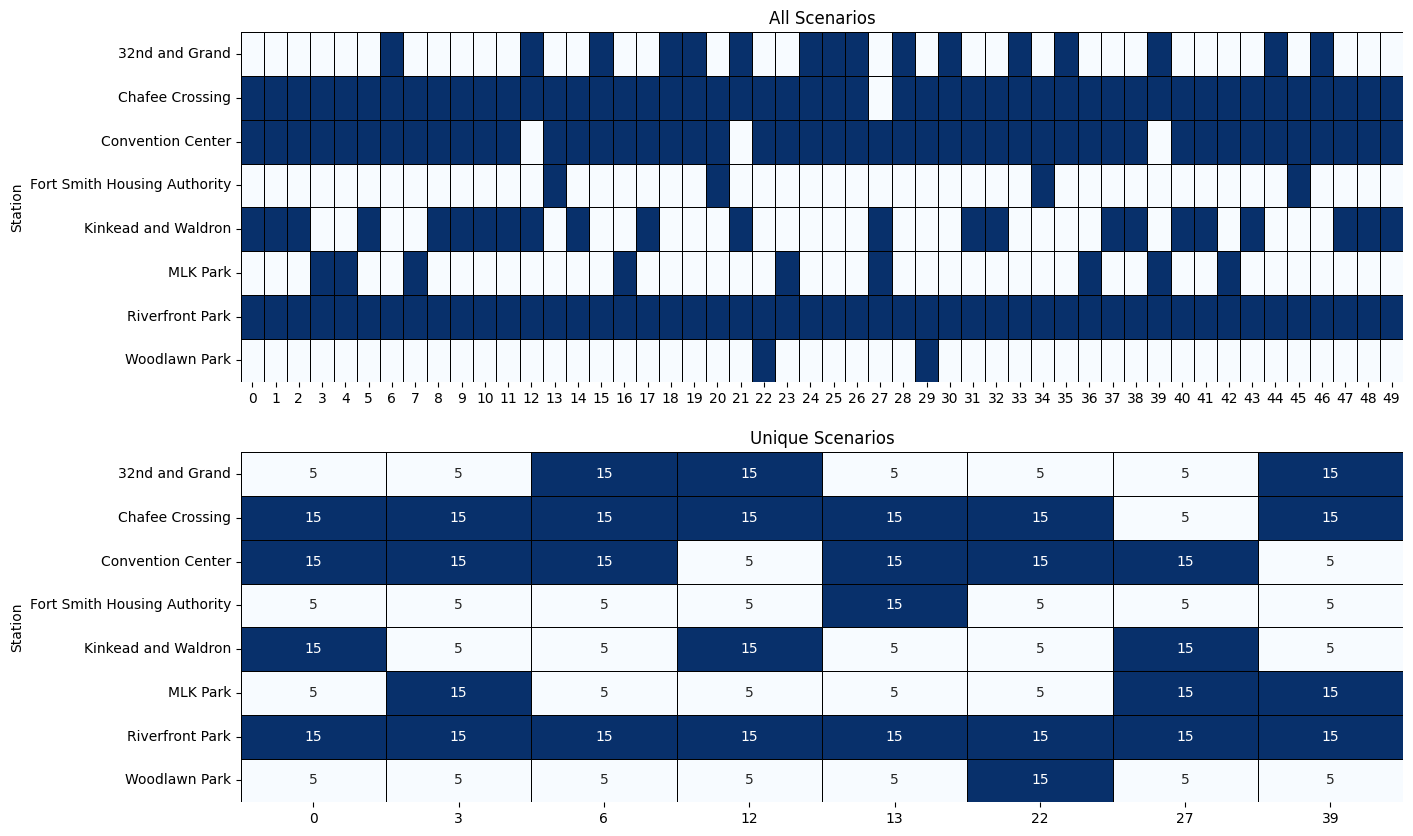

In [711]:
df_allScenarios = df_allScenarios.astype(int)
df_allScenarios.columns = np.arange(0,50,1)
df_uniqueScenarios = df_allScenarios.T.drop_duplicates().T

fig, axs = plt.subplots(2,1, figsize=(15,10))
axs[0].set_title("All Scenarios")
axs[1].set_title("Unique Scenarios")

sns.heatmap(df_allScenarios, cmap="Blues", annot=False, linewidths=0.5, linecolor='black', cbar=False, ax=axs[0])
sns.heatmap(df_uniqueScenarios, cmap="Blues", annot=True, linewidths=0.5, linecolor='black', cbar=False, ax=axs[1])

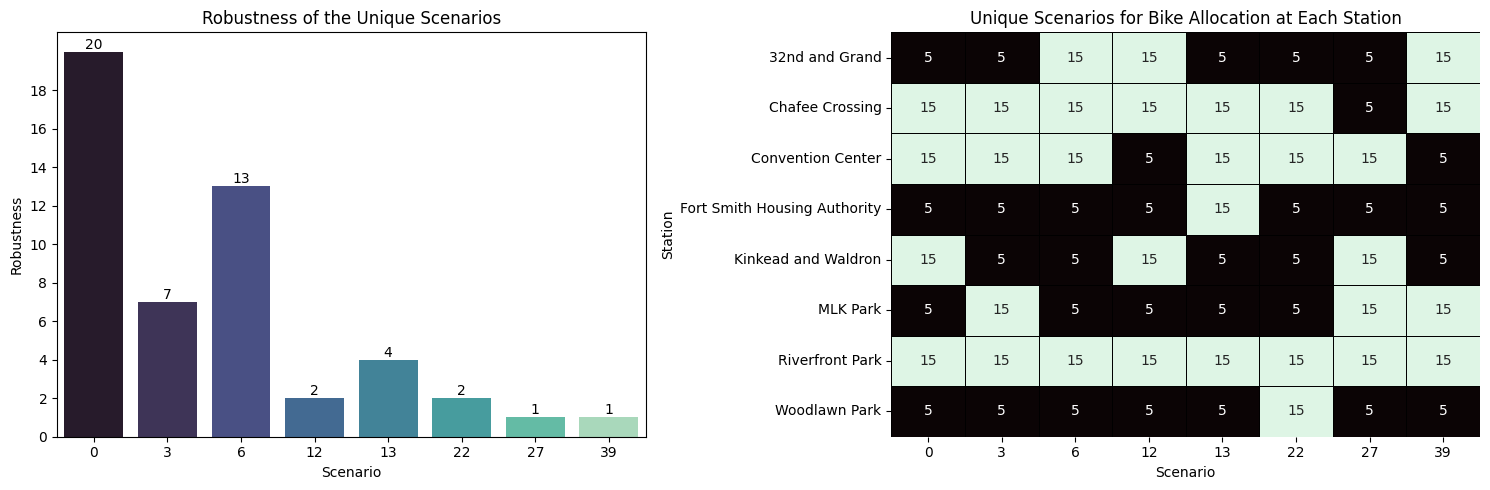

In [712]:
df_robustness = {}

for s1 in df_uniqueScenarios:
    df_robustness[s1] = 0
    for s2 in df_allScenarios:
        if (df_uniqueScenarios[s1]!=df_allScenarios[s2]).sum() == 0:
            df_robustness[s1] += 1
            
df_robustness = pd.DataFrame(df_robustness, index=["Counts"]).T

fig,axs = plt.subplots(1,2, figsize=(15,5))
sns.barplot(data=df_robustness, x=df_robustness.index, y=df_robustness["Counts"], palette="mako", ax=axs[0])
axs[0].bar_label(axs[0].containers[0])
axs[0].set_yticks(ticks=np.arange(0, max(df_robustness["Counts"]), 2))
axs[0].set_yticklabels(np.arange(0, max(df_robustness["Counts"]), 2))
axs[0].set_xlabel("Scenario")
axs[0].set_ylabel("Robustness")
axs[0].set_title("Robustness of the Unique Scenarios")

sns.heatmap(df_uniqueScenarios, cmap="mako", annot=True, linewidths=0.5, linecolor='black', cbar=False, ax=axs[1])
axs[1].set_title("Unique Scenarios for Bike Allocation at Each Station")
axs[1].set_xlabel("Scenario")

plt.tight_layout()